In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 

import sys
sys.path.append(f'/media/beans/ssd/bespoke')
from constants import *

import matplotlib.pyplot as plt
from viz_utils import draw_wps
from blender_dataloader import *
from constants import *
from imports import *
from train_utils import get_torque

/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:689: FutureWarning: This class has been deprecated. Please use CoarseDropout
  warnings.warn(
/home/beans/miniconda3/envs/py38/lib/python3.8/site-packages/albumentations/augmentations/transforms.py:965: FutureWarning: This class has been deprecated. Please use ImageCompression
  warnings.warn(


In [2]:
get_obs_per_sec()

101.08249

In [3]:
paths = glob.glob(f"{BLENDER_MEMBANK_ROOT}/**/obs_per_sec.npy", recursive=True)
obs_per_sec = np.array([np.load(p)[0] for p in paths])
obs_per_sec

array([10.818306 ,  6.881463 ,  7.193183 ,  9.41058  ,  7.059031 ,
        8.778371 ,  6.71989  ,  6.729099 , 10.573611 ,  9.671347 ,
        7.2676497,  9.979954 ], dtype=float32)

In [4]:
set_should_stop(True)

In [5]:
dataloader = BlenderDataloader("trn", 6)

In [6]:
dataloader.get_obs_per_second()

124.43371

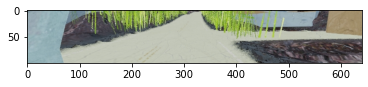

In [7]:
ix = 1
plt.imshow(dataloader.img_chunk[ix][0])

(array([ 92.,  68., 167., 121.,  21.,  28.,  48.,   7.,  28., 116.]),
 array([33.80103 , 38.508045, 43.215057, 47.922073, 52.62909 , 57.336105,
        62.043118, 66.75013 , 71.457146, 76.16416 , 80.87118 ],
       dtype=float32),
 <BarContainer object of 10 artists>)

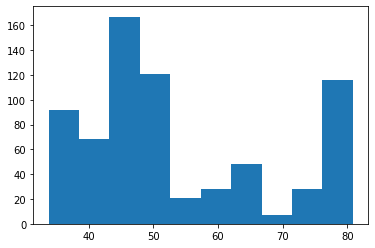

In [8]:
plt.hist(dataloader.aux_chunk[:,:,2].flatten())

(array([ 37.,  29., 112., 276.,  75.,  63.,  10.,  13.,  29.,  52.]),
 array([-0.07459148, -0.05106756, -0.02754364, -0.00401972,  0.01950419,
         0.04302811,  0.06655203,  0.09007595,  0.11359987,  0.1371238 ,
         0.1606477 ], dtype=float32),
 <BarContainer object of 10 artists>)

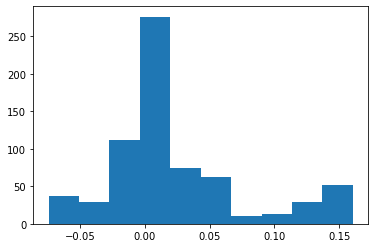

In [9]:
plt.hist(dataloader.targets_chunk[:,:,14].flatten())

In [10]:
%%time
batch, is_first_in_seq = dataloader.get_batch()

(img, 
                                    aux, 
                                    wp_angles,
                                     wp_headings,
                                     to_pred_mask,
                                    current_tire_angles_rad, # Extras
                                    current_speeds_mps, 
                                    pitch, 
                                    yaw) = batch

is_first_in_seq

CPU times: user 278 µs, sys: 189 µs, total: 467 µs
Wall time: 432 µs


True

In [12]:
wp_angles.shape, wp_headings.shape

(torch.Size([6, 9, 30]), torch.Size([6, 9, 30]))

(array([ 372.,  816., 1871., 4457., 5006., 5060., 1840., 1081.,  323.,
          54.]),
 array([-2.021 , -1.638 , -1.255 , -0.871 , -0.4878, -0.1045,  0.2788,
         0.662 ,  1.046 ,  1.429 ,  1.8125], dtype=float16),
 <BarContainer object of 10 artists>)

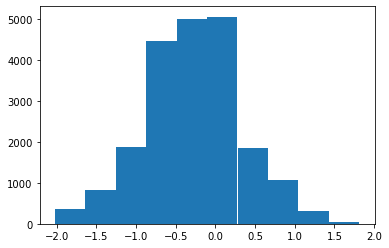

In [31]:
plt.hist(wp_angles.flatten().detach().cpu().numpy())

(array([  13.,   81.,  733., 2100., 7399., 7755., 2330.,  405.,   55.,
           9.]),
 array([-3.543 , -2.896 , -2.252 , -1.605 , -0.9595, -0.3135,  0.3325,
         0.9785,  1.624 ,  2.27  ,  2.916 ], dtype=float16),
 <BarContainer object of 10 artists>)

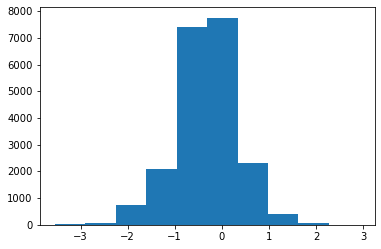

In [34]:
plt.hist(wp_headings.flatten().detach().cpu().numpy())

In [35]:
to_pred_mask.sum() / to_pred_mask.numel()

tensor(0.8145, device='cuda:0', dtype=torch.float16)

In [36]:
t = get_torque(wp_angles, aux)
plt.hist(t.cpu().numpy().flatten())

IndexError: index 9 is out of bounds for axis 1 with size 9

In [49]:
abs(t).max()

tensor(3904., device='cuda:0', dtype=torch.float16)

(array([161.,  60.,  19.,   8.,   4.,   2.,   1.,   0.,   0.,   1.]),
 array([  0. ,  62.6, 125.2, 187.8, 250.4, 313. , 375.5, 438.2, 500.8,
        563.5, 626. ], dtype=float16),
 <BarContainer object of 10 artists>)

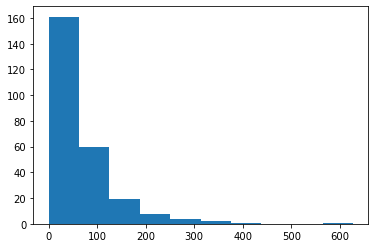

In [50]:
td = abs(t[:,1:,:] - t[:,:-1,:])
plt.hist(td.cpu().numpy().flatten())

In [51]:
abs(td).max()

tensor(626., device='cuda:0', dtype=torch.float16)

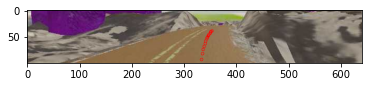

In [67]:

traj = dataloader.targets_chunk[ix][0]
img = dataloader.img_chunk[ix][0]

plt.imshow(draw_wps(img, traj))

In [8]:
import subprocess

In [9]:
# Load up membank from ssd to shm
subprocess.run("cp -R /media/beans/beans_data/blender_membank /dev/shm/blender_membank", shell=True)

CompletedProcess(args='cp -R /media/beans/beans_data/blender_membank /dev/shm/blender_membank', returncode=0)

In [ ]:
# save membank to ssd
subprocess.run("cp -R /dev/shm/blender_membank /media/beans/beans_data/blender_membank", shell=True)